In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
    )

In [3]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    )

In [4]:
batch_size = 32

In [5]:
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [6]:
for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32]) torch.int64


In [7]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32]) torch.int64


------------------------------------------------------
Image 0 in the minibatch
Image dimensions: (28, 28)
Intensity range is (0.0, 1.0) and data type is float32
Label 9
------------------------------------------------------
Image 1 in the minibatch
Image dimensions: (28, 28)
Intensity range is (0.0, 1.0) and data type is float32
Label 2
------------------------------------------------------
Image 2 in the minibatch
Image dimensions: (28, 28)
Intensity range is (0.0, 1.0) and data type is float32
Label 1
------------------------------------------------------
Image 3 in the minibatch
Image dimensions: (28, 28)
Intensity range is (0.0, 1.0) and data type is float32
Label 1
------------------------------------------------------
Image 4 in the minibatch
Image dimensions: (28, 28)
Intensity range is (0.0, 1.0) and data type is float32
Label 6
------------------------------------------------------
Image 5 in the minibatch
Image dimensions: (28, 28)
Intensity range is (0.0, 1.0) and data type

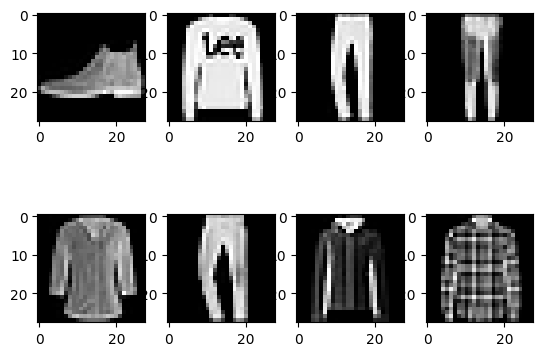

In [8]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(8):
    print('-' * 54)
    print(f'Image {i} in the minibatch')
    img = X[i,0,:, :].numpy()
    print(f'Image dimensions: {img.shape}')
    print(f'Intensity range is ({round(np.min(img),2)}, {round(np.max(img),2)}) and data type is {img.dtype}')
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    print(f'Label {y[i]}')

plt.show()

### Task 01 : Sample distribution (number of images of each class in training and test data)


In [9]:
def sample_distribution(dataset):
    class_count = [0] * len(dataset.classes)

    for _, label in dataset:
      class_count[label] += 1

    for class_idx, class_name in enumerate(dataset.classes):
        print(f"Class {class_name}: {class_count[class_idx]} Samples")

In [10]:
print(f"Sample Distribution for : Training Data\n",'-'*len("Sample Distribution for : Training Data"),sep='')
sample_distribution(training_data)

Sample Distribution for : Training Data
---------------------------------------
Class T-shirt/top: 6000 Samples
Class Trouser: 6000 Samples
Class Pullover: 6000 Samples
Class Dress: 6000 Samples
Class Coat: 6000 Samples
Class Sandal: 6000 Samples
Class Shirt: 6000 Samples
Class Sneaker: 6000 Samples
Class Bag: 6000 Samples
Class Ankle boot: 6000 Samples


In [11]:
print(f"Sample Distribution for : Testing Data\n",'-'*len("Sample Distribution for : Testing Data"),sep='')
sample_distribution(test_data)

Sample Distribution for : Testing Data
--------------------------------------
Class T-shirt/top: 1000 Samples
Class Trouser: 1000 Samples
Class Pullover: 1000 Samples
Class Dress: 1000 Samples
Class Coat: 1000 Samples
Class Sandal: 1000 Samples
Class Shirt: 1000 Samples
Class Sneaker: 1000 Samples
Class Bag: 1000 Samples
Class Ankle boot: 1000 Samples


#### Using Dictionary

In [12]:
train_total = 0
train_counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [13]:
for data in train_dataloader:
    Xs, ys = data
    for y in ys:
        train_counter_dict[int(y)] += 1
        train_total += 1

In [14]:
heading1 = "Sample Distribution : Training Data"
x1 = len(heading1)
print(heading1,"\n",'-'*x1,sep='')

for class_label, count in train_counter_dict.items():
    print(f'Class {class_label} : {count} Samples')

Sample Distribution : Training Data
-----------------------------------
Class 0 : 6000 Samples
Class 1 : 6000 Samples
Class 2 : 6000 Samples
Class 3 : 6000 Samples
Class 4 : 6000 Samples
Class 5 : 6000 Samples
Class 6 : 6000 Samples
Class 7 : 6000 Samples
Class 8 : 6000 Samples
Class 9 : 6000 Samples


In [15]:
test_total = 0
test_counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [16]:
for data in test_dataloader:
    Xs, ys = data
    for y in ys:
        test_counter_dict[int(y)] += 1
        test_total += 1

In [17]:
heading2 = "Sample Distribution : Testing Data"
x2 = len(heading2)
print(heading2,"\n",'-'*x2,sep='')

for class_label, count in test_counter_dict.items():
    print(f'Class {class_label} : {count} Samples')

Sample Distribution : Testing Data
----------------------------------
Class 0 : 1000 Samples
Class 1 : 1000 Samples
Class 2 : 1000 Samples
Class 3 : 1000 Samples
Class 4 : 1000 Samples
Class 5 : 1000 Samples
Class 6 : 1000 Samples
Class 7 : 1000 Samples
Class 8 : 1000 Samples
Class 9 : 1000 Samples


### Network + Training

In [18]:
import torch.nn as nn
import torch.nn.functional as F

In [19]:
class Neu_Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 64*5*5)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [21]:
model = Neu_Net().to(device)

In [22]:
print(model)
for p in model.parameters():
    print(p.size())

Neu_Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.25, inplace=False)
)
torch.Size([32, 1, 3, 3])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([128, 1600])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


In [23]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.0001)

In [24]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [25]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Results : \n Accuracy: {(100*correct):>0.2f}%, Avg. Loss: {test_loss:>8f} \n")

    return test_loss, correct

In [26]:
epochs = 10

In [27]:
best_accuracy = 0.0
best_model_weights = None

#### Task 02 : Track Best Model : Output a message each time a new best model is found


In [28]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-----------------------------")
    train(train_dataloader, model, loss_function, optimizer)
    test_loss, test_accuracy = test(test_dataloader, model, loss_function)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_weights = model.state_dict()
        print("New Best Model Found!\n",'='*len("New Best Model Found!"),sep='')
        print(f"Accuracy: {(best_accuracy*100):>0.2f} %","\n")


print("Done!")

Epoch 1
-----------------------------
loss: 2.291992  [    0/60000]
loss: 0.800195  [ 3200/60000]
loss: 0.573896  [ 6400/60000]
loss: 0.877636  [ 9600/60000]
loss: 0.468881  [12800/60000]
loss: 0.775308  [16000/60000]
loss: 0.432055  [19200/60000]
loss: 0.348213  [22400/60000]
loss: 0.444109  [25600/60000]
loss: 0.701740  [28800/60000]
loss: 0.492138  [32000/60000]
loss: 0.364145  [35200/60000]
loss: 0.489401  [38400/60000]
loss: 0.628469  [41600/60000]
loss: 0.641915  [44800/60000]
loss: 0.439922  [48000/60000]
loss: 0.412546  [51200/60000]
loss: 0.676265  [54400/60000]
loss: 0.471279  [57600/60000]
Test Results : 
 Accuracy: 85.39%, Avg. Loss: 0.392345 

New Best Model Found!
Accuracy: 85.39 % 

Epoch 2
-----------------------------
loss: 0.350216  [    0/60000]
loss: 0.461888  [ 3200/60000]
loss: 0.263428  [ 6400/60000]
loss: 0.521550  [ 9600/60000]
loss: 0.278628  [12800/60000]
loss: 0.631944  [16000/60000]
loss: 0.366047  [19200/60000]
loss: 0.227923  [22400/60000]
loss: 0.434671 

In [29]:
print(f"Overall Best Model Accuracy: {(best_accuracy*100):>0.2f} %","\n")

Overall Best Model Accuracy: 90.73 % 



#### Best Model Parameters

In [30]:
def best_model_parameters(model_state_dict):

    for name, param in model_state_dict.items():

        if "weight" in name or "bias" in name:
            print(f"Parameter name: {name}")
            print(f"Parameter shape: {param.shape}")
            print(f"Parameter values: {param}")
            print("=" * 100)

        elif "bn" in name:
            print(f"Batch Normalization layer: {name}")
            print(f"Layer parameters: {param}")
            print("=" * 100)

        elif "dropout" in name:
            print(f"Dropout layer: {name}")
            print("=" * 100)

In [31]:
model.load_state_dict(best_model_weights)
best_model_parameters(model.state_dict())

Parameter name: conv1.weight
Parameter shape: torch.Size([32, 1, 3, 3])
Parameter values: tensor([[[[-0.1211,  0.2987, -0.1672],
          [-0.3997,  0.0712,  0.3297],
          [-0.5104,  0.1693,  0.3336]]],


        [[[-0.3863, -0.6935, -1.1315],
          [ 0.0806, -0.0965, -0.3243],
          [ 0.3787,  0.3700, -0.0459]]],


        [[[ 0.1010,  0.0322, -0.1337],
          [ 0.2454,  0.0788, -0.3255],
          [-0.2333,  0.5770, -0.3447]]],


        [[[-0.3784, -0.2041, -0.0794],
          [-0.1144, -0.0196,  0.1355],
          [ 0.4438,  0.2297, -0.0919]]],


        [[[ 0.0028,  0.3288, -0.3087],
          [-0.0782,  0.2439, -0.1571],
          [ 0.1848,  0.2938, -0.4714]]],


        [[[-0.0558, -0.2452, -1.0558],
          [-0.0896, -0.6282, -1.2246],
          [ 0.4087, -0.1205, -0.5752]]],


        [[[ 0.2083, -0.4310, -0.0995],
          [ 0.2753,  0.3490,  0.1845],
          [-0.3603, -0.0980,  0.2301]]],


        [[[-0.4246, -0.1638,  0.4903],
          [-0.0581,  0.3

### Task 03 : Class-wise Performance

In [32]:
def classwise_performance(dataloader, model):

    class_correct = [0] * 10
    class_total = [0] * 10
    all_true_labels = []
    all_predicted_labels =  []

    model.eval()

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            predicted_classes = pred.argmax(1)

            for i in range(len(y)):
                true_class = y[i].item()
                predicted_class = predicted_classes[i].item()
                all_true_labels.append(true_class)
                all_predicted_labels.append(predicted_class)
                if true_class == predicted_class:
                    class_correct[true_class] += 1
                class_total[true_class] += 1

    j = 0
    for class_idx in range(10):
        class_name = test_data.classes[class_idx]
        accuracy = 100 * class_correct[class_idx] / class_total[class_idx]
        print(f"Class {j} : Accuracy {accuracy:.2f}% ({class_correct[class_idx]}/{class_total[class_idx]})")
        j += 1

    return all_true_labels, all_predicted_labels

In [33]:
print("Class-wise Performance :\n",'='*len("Class-wise Performance :"),sep='')
model.load_state_dict(best_model_weights)
true, predicted = classwise_performance(test_dataloader, model)

Class-wise Performance :
Class 0 : Accuracy 88.80% (888/1000)
Class 1 : Accuracy 97.60% (976/1000)
Class 2 : Accuracy 81.70% (817/1000)
Class 3 : Accuracy 92.20% (922/1000)
Class 4 : Accuracy 87.00% (870/1000)
Class 5 : Accuracy 97.40% (974/1000)
Class 6 : Accuracy 72.20% (722/1000)
Class 7 : Accuracy 97.80% (978/1000)
Class 8 : Accuracy 97.80% (978/1000)
Class 9 : Accuracy 94.80% (948/1000)


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [35]:
def plot_confusion_matrix(all_true_labels, all_predicted_labels):

    true, pred = all_true_labels, all_predicted_labels

    conf_matrix = confusion_matrix(true, pred)

    plt.figure(figsize=(16, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.classes, yticklabels=test_data.classes)
    plt.xlabel("\nPredicted Label\n")
    plt.ylabel("\nTrue Label\n")
    plt.title("\n\nConfusion Matrix\n\n")
    plt.show()

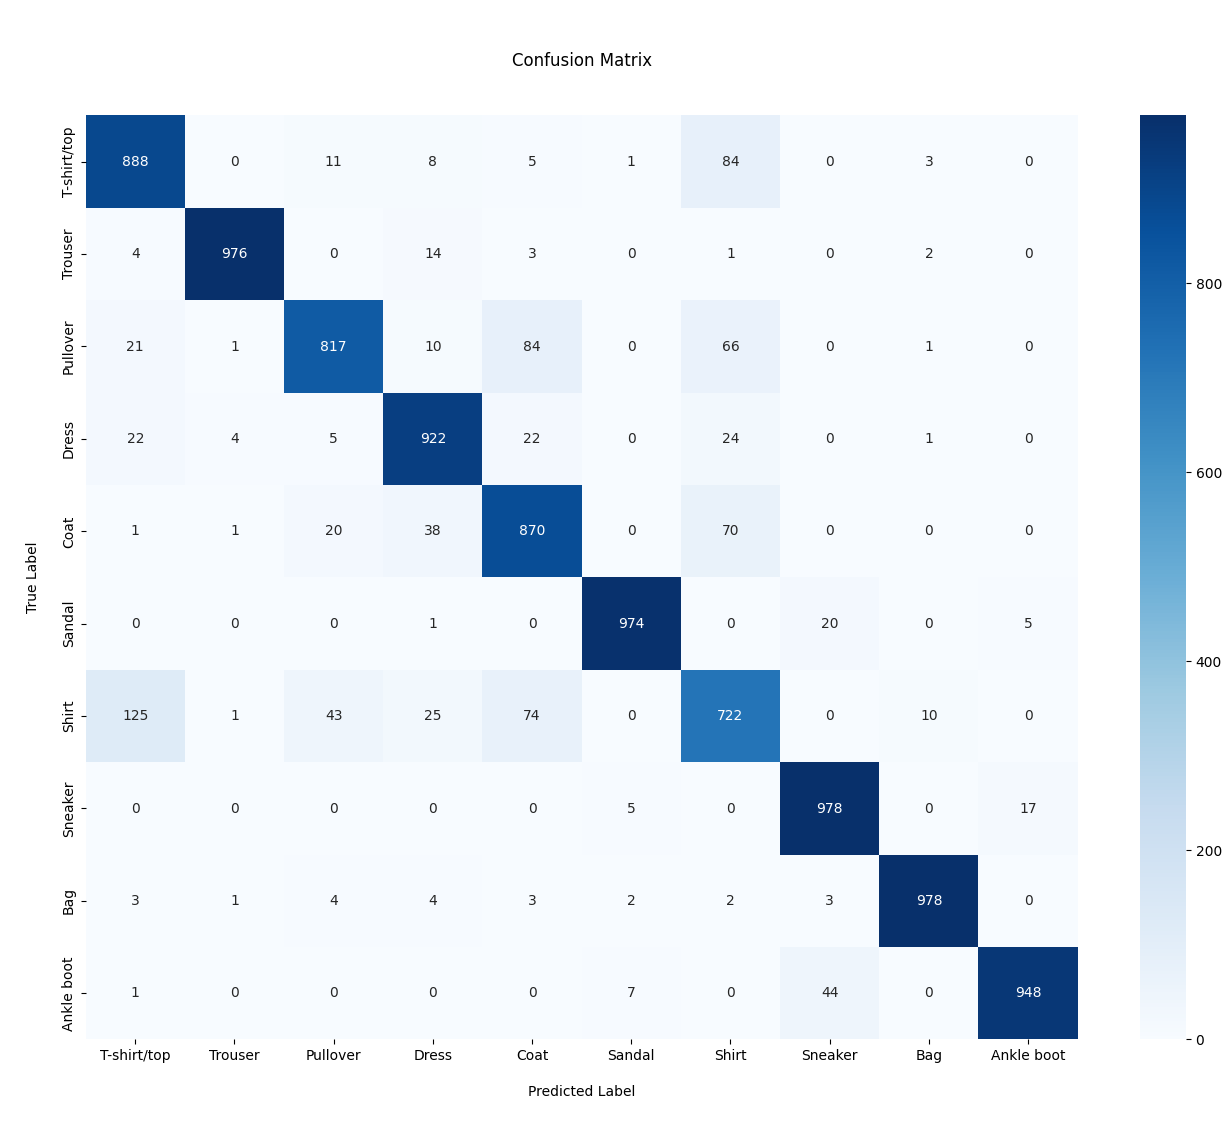

In [36]:
plot_confusion_matrix(true, predicted)